In [99]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
dfiris = pd.DataFrame(iris['data'],
                     columns = iris['feature_names'])

bisa mengelompokan misal tinggi bandan ( mana yg tinggi atau tidak) berat (mana yang berat atau kurang) lalu bisa dipisah menurut golongan

In [100]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [101]:
dfiris['target'] = iris['target']
dfiris['jenis'] = dfiris['target'].apply(
        lambda x : iris['target_names'][x])
dfiris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,jenis
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [102]:
#seperate data
dfsetosa = dfiris[dfiris['target'] == 0] 
dfversicolor = dfiris[dfiris['target'] == 1] 
dfvirginica = dfiris[dfiris['target'] == 2] 

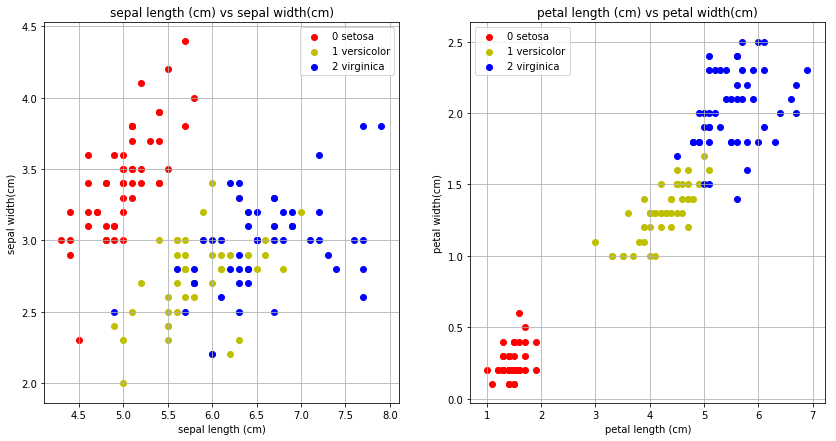

In [103]:
#plt.figure(figsize=(10,7))
#sepal length v sepal width 
fig = plt.figure('dfiris',figsize=(14,7))
plt.subplot(121)
plt.scatter(
        dfsetosa['sepal length (cm)'],
        dfsetosa['sepal width (cm)'],
        color = 'r',
        marker = 'o')  
plt.scatter(
        dfversicolor['sepal length (cm)'],
       dfversicolor['sepal width (cm)'],
        color = 'y',
        marker = 'o')  
plt.scatter(
        dfvirginica['sepal length (cm)'],
        dfvirginica['sepal width (cm)'],
        color = 'b',
        marker = 'o')  

plt.title('sepal length (cm) vs sepal width(cm)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width(cm)')
plt.legend(['0 setosa', '1 versicolor','2 virginica'])
plt.grid(True)
####################
plt.subplot(122)
plt.scatter(
        dfsetosa['petal length (cm)'],
        dfsetosa['petal width (cm)'],
        color = 'r',
        marker = 'o')  
plt.scatter(
        dfversicolor['petal length (cm)'],
       dfversicolor['petal width (cm)'],
        color = 'y',
        marker = 'o')  
plt.scatter(
        dfvirginica['petal length (cm)'],
        dfvirginica['petal width (cm)'],
        color = 'b',
        marker = 'o')  

plt.title('petal length (cm) vs petal width(cm)')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width(cm)')
plt.legend(['0 setosa', '1 versicolor','2 virginica'])
plt.grid(True)

In [104]:
dfiris['target'] = iris['target']
dfiris['jenis'] = dfiris['target'].apply(
        lambda x : iris['target_names'][x])
dfiris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,jenis
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [105]:
#split datasets : train 90% , test = 10%

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
            dfiris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']],
            dfiris['jenis'],
            test_size = .1)

In [106]:
#support vector machine
#support vector classifier

from sklearn.svm import SVC
model = SVC(gamma = 'auto')

In [107]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
model.predict([[5.1,3.5,1.4,0.2]])

array(['setosa'], dtype=object)

In [109]:
model.score(x_train,y_train)

0.9925925925925926

In [110]:
print(model.predict([x_test.iloc[0]]))
print(y_test.iloc[0]) #actual


['virginica']
versicolor


# plot SVM

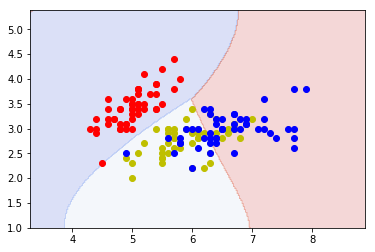

In [119]:
def bikin_meshgrid(x,y):
    x_min = x.min()-1
    x_max = x.max()+1
    y_min = y.min()-1
    y_max = y.max()+1
    xx,yy = np.meshgrid(
        np.arange(x_min,x_max,.02),
        np.arange(y_min,y_max,.02)
    )
    return xx,yy

sepal = iris['data'][:,:2] #sepal length n width
x0= sepal[:,0]
x1= sepal[:,1]
xx,yy =bikin_meshgrid(x0,x1)

#fitting ulang
model.fit(sepal,iris['target'])

#plot

def plotsvm(ax,model,xx,yy,**params):
    z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    hasil= ax.contourf(xx,yy,z,**params)
    return hasil

fig = plt.figure('SVM')
ax = plt.subplot()

plotsvm(ax,model,xx,yy,cmap = 'coolwarm',alpha =.2)

plt.scatter(
        dfsetosa['sepal length (cm)'],
        dfsetosa['sepal width (cm)'],
        color = 'r',
        marker = 'o')  
plt.scatter(
        dfversicolor['sepal length (cm)'],
       dfversicolor['sepal width (cm)'],
        color = 'y',
        marker = 'o')  
plt.scatter(
        dfvirginica['sepal length (cm)'],
        dfvirginica['sepal width (cm)'],
        color = 'b',
        marker = 'o')  

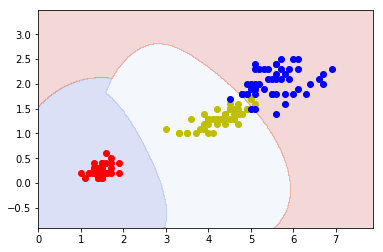

In [125]:
def bikin_meshgrid(x,y):
    x_min = x.min()-1
    x_max = x.max()+1
    y_min = y.min()-1
    y_max = y.max()+1
    xx,yy = np.meshgrid(
        np.arange(x_min,x_max,.02),
        np.arange(y_min,y_max,.02)
    )
    return xx,yy

petal = iris['data'][:,2:] #petal length n width
x0= petal[:,0]
x1= petal[:,1]
xx,yy =bikin_meshgrid(x0,x1)

#fitting ulang
model.fit(petal,iris['target'])

#plot

def plotsvm(ax,model,xx,yy,**params):
    z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    hasil= ax.contourf(xx,yy,z,**params)
    return hasil

fig = plt.figure('SVM')
ax = plt.subplot()

plotsvm(ax,model,xx,yy,cmap = 'coolwarm',alpha =.2)

plt.scatter(
        dfsetosa['petal length (cm)'],
        dfsetosa['petal width (cm)'],
        color = 'r',
        marker = 'o')  
plt.scatter(
        dfversicolor['petal length (cm)'],
       dfversicolor['petal width (cm)'],
        color = 'y',
        marker = 'o')  
plt.scatter(
        dfvirginica['petal length (cm)'],
        dfvirginica['petal width (cm)'],
        color = 'b',
fig = plt.figure('dfiris',figsize=(14,7))
plt.subplot(121)        marker = 'o')  

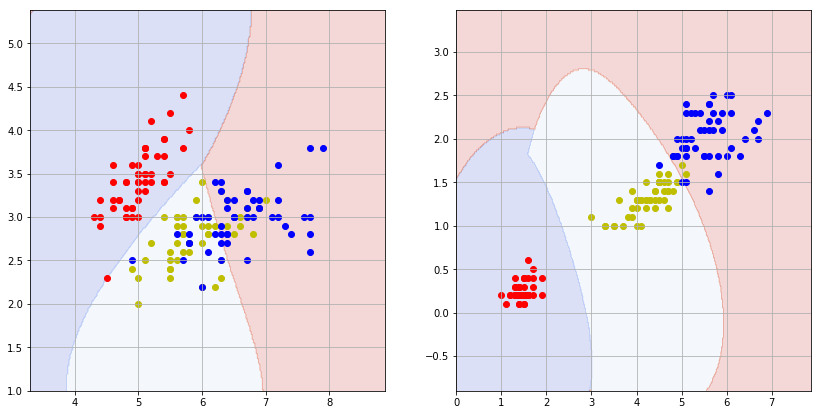

In [133]:
fig = plt.figure('SVM',figsize=(14,7))

#=======================================
def bikin_meshgrid(x,y):
    x_min = x.min()-1
    x_max = x.max()+1
    y_min = y.min()-1
    y_max = y.max()+1
    xx,yy = np.meshgrid(
        np.arange(x_min,x_max,.02),
        np.arange(y_min,y_max,.02)
    )
    return xx,yy

sepal = iris['data'][:,:2] #sepal length n width
x0= sepal[:,0]
x1= sepal[:,1]
xx,yy =bikin_meshgrid(x0,x1)

#fitting ulang
model.fit(sepal,iris['target'])

#plot

def plotsvm(ax,model,xx,yy,**params):
    z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    hasil= ax.contourf(xx,yy,z,**params)
    return hasil

fig = plt.figure('SVM')
ax = plt.subplot(121)

plotsvm(ax,model,xx,yy,cmap = 'coolwarm',alpha =.2)

plt.scatter(
        dfsetosa['sepal length (cm)'],
        dfsetosa['sepal width (cm)'],
        color = 'r',
        marker = 'o')  
plt.scatter(
        dfversicolor['sepal length (cm)'],
       dfversicolor['sepal width (cm)'],
        color = 'y',
        marker = 'o')  
plt.scatter(
        dfvirginica['sepal length (cm)'],
        dfvirginica['sepal width (cm)'],
        color = 'b',
        marker = 'o')  
plt.grid(True)
#=============================================================================

def bikin_meshgrid(x,y):
    x_min = x.min()-1
    x_max = x.max()+1
    y_min = y.min()-1
    y_max = y.max()+1
    xx,yy = np.meshgrid(
        np.arange(x_min,x_max,.02),
        np.arange(y_min,y_max,.02)
    )
    return xx,yy

petal = iris['data'][:,2:] #petal length n width
x0= petal[:,0]
x1= petal[:,1]
xx,yy =bikin_meshgrid(x0,x1)

#fitting ulang
model.fit(petal,iris['target'])

#plot

def plotsvm(ax,model,xx,yy,**params):
    z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    hasil= ax.contourf(xx,yy,z,**params)
    return hasil

fig = plt.figure('SVM')
ax = plt.subplot(122)

plotsvm(ax,model,xx,yy,cmap = 'coolwarm',alpha =.2)

plt.scatter(
        dfsetosa['petal length (cm)'],
        dfsetosa['petal width (cm)'],
        color = 'r',
        marker = 'o')  
plt.scatter(
        dfversicolor['petal length (cm)'],
       dfversicolor['petal width (cm)'],
        color = 'y',
        marker = 'o')  
plt.scatter(
        dfvirginica['petal length (cm)'],
        dfvirginica['petal width (cm)'],
        color = 'b',
        marker = 'o')  
plt.grid(True)